# COMP30810 - INTRO TO TEXT ANALYTICS
> LECTURER: BINH THANH LE

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#From-Raw-to-Representation-Vectors" data-toc-modified-id="From-Raw-to-Representation-Vectors-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>From Raw to Representation Vectors</a></span></li><li><span><a href="#Split-Raw-data-into-Train-and-Test-set" data-toc-modified-id="Split-Raw-data-into-Train-and-Test-set-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Split Raw data into Train and Test set</a></span></li><li><span><a href="#Tokens-Vectors-to-TF-IDF-Vectors" data-toc-modified-id="Tokens-Vectors-to-TF-IDF-Vectors-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Tokens Vectors to TF-IDF Vectors</a></span></li><li><span><a href="#Model-Learning" data-toc-modified-id="Model-Learning-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Learning</a></span><ul class="toc-item"><li><span><a href="#BAYES-classifier" data-toc-modified-id="BAYES-classifier-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>BAYES classifier</a></span></li><li><span><a href="#KNN-classifier" data-toc-modified-id="KNN-classifier-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>KNN classifier</a></span></li></ul></li><li><span><a href="#Applying-Models-to-Test-Data" data-toc-modified-id="Applying-Models-to-Test-Data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Applying Models to Test Data</a></span></li><li><span><a href="#Evaluation-Metrics" data-toc-modified-id="Evaluation-Metrics-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Evaluation Metrics</a></span><ul class="toc-item"><li><span><a href="#Accuracy-and-Error-Rate" data-toc-modified-id="Accuracy-and-Error-Rate-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Accuracy and Error Rate</a></span></li><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Confusion Matrix</a></span><ul class="toc-item"><li><span><a href="#Print-Confusion-Matrix-(Using-Sklearn)" data-toc-modified-id="Print-Confusion-Matrix-(Using-Sklearn)-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>Print Confusion Matrix (Using Sklearn)</a></span></li><li><span><a href="#Print-Confusion-Matrix-(Using-pandas_ml)" data-toc-modified-id="Print-Confusion-Matrix-(Using-pandas_ml)-7.2.2"><span class="toc-item-num">7.2.2&nbsp;&nbsp;</span>Print Confusion Matrix (Using pandas_ml)</a></span></li><li><span><a href="#Plot-the-Confusion-Matrix" data-toc-modified-id="Plot-the-Confusion-Matrix-7.2.3"><span class="toc-item-num">7.2.3&nbsp;&nbsp;</span>Plot the Confusion Matrix</a></span></li></ul></li><li><span><a href="#Precision---Recall---F1" data-toc-modified-id="Precision---Recall---F1-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Precision - Recall - F1</a></span><ul class="toc-item"><li><span><a href="#Precision" data-toc-modified-id="Precision-7.3.1"><span class="toc-item-num">7.3.1&nbsp;&nbsp;</span>Precision</a></span></li><li><span><a href="#Recall" data-toc-modified-id="Recall-7.3.2"><span class="toc-item-num">7.3.2&nbsp;&nbsp;</span>Recall</a></span></li></ul></li><li><span><a href="#F1-Score" data-toc-modified-id="F1-Score-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>F1 Score</a></span></li><li><span><a href="#Area-Under-the-Curve" data-toc-modified-id="Area-Under-the-Curve-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Area Under the Curve</a></span><ul class="toc-item"><li><span><a href="#ROC-curve" data-toc-modified-id="ROC-curve-7.5.1"><span class="toc-item-num">7.5.1&nbsp;&nbsp;</span>ROC curve</a></span></li><li><span><a href="#AUC---Area-Under-the-Curve" data-toc-modified-id="AUC---Area-Under-the-Curve-7.5.2"><span class="toc-item-num">7.5.2&nbsp;&nbsp;</span>AUC - Area Under the Curve</a></span></li><li><span><a href="#Plot-Individually-Plot" data-toc-modified-id="Plot-Individually-Plot-7.5.3"><span class="toc-item-num">7.5.3&nbsp;&nbsp;</span>Plot Individually Plot</a></span></li><li><span><a href="#Plot-2-ROC-in-one-Figure" data-toc-modified-id="Plot-2-ROC-in-one-Figure-7.5.4"><span class="toc-item-num">7.5.4&nbsp;&nbsp;</span>Plot 2 ROC in one Figure</a></span></li></ul></li></ul></li></ul></div>

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import sklearn
import os, io, nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords 
import collections
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import re
from collections import Counter

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB


from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Load Data

In [2]:
# def readdata(data_path):
#     df_raw = pd.DataFrame([],columns=['Filename','Content','Class'])

#     for root, directories, files in os.walk(data_path):
#         for filename in files:
#             if not filename.startswith('.'):
#                 classname = (os.path.basename(root))
#                 if (classname in ['neg', 'pos']):
#                     _name = os.path.splitext(filename)[0]
#                     filepath = os.path.join(root, filename)
#                     f = open(filepath,"r",encoding='utf8') 
#                     content = f.read()
#                     content = " ".join(str(content).split())
#                     pieces = {'Filename': _name, 'Content': (content), 'Class':classname}
#                     df_raw = df_raw.append(pieces,ignore_index=True)
#     return df_raw

In [3]:
# df_raw = readdata('./data/')
# df_raw

In [4]:
# df_raw.to_csv('./data/raw_data.csv',sep=',',index=False)

In [5]:
# del df_raw
df_raw = pd.read_csv('./data/raw_data.csv',sep=',')
df_raw.head(10)

,Filename,Content,Class
0,7650_9,"Wow, I loved this film. It may not have had th...",pos
1,10987_4,I greatly enjoyed Margaret Atwood's novel 'The...,neg
2,151_1,This is really terrible.<br /><br />The only r...,neg
3,4761_10,An excellent film with great performances from...,pos
4,7078_9,"""Twelve Monkeys"" is odd and disturbing, yet be...",pos
5,400_10,"When Tsui Hark experiments, nothing and no one...",pos
6,4592_9,Jackie Chan's Police Story is a landmark film ...,pos
7,2191_10,Shakespeare said that we are actors put into a...,pos
8,12482_4,Deathstalker is directed by John Watson and it...,neg
9,11644_10,This show is awesome! I have been a fan since ...,pos


In [6]:
data = df_raw.iloc[:,:2]
data.head(5)

,Filename,Content
0,7650_9,"Wow, I loved this film. It may not have had th..."
1,10987_4,I greatly enjoyed Margaret Atwood's novel 'The...
2,151_1,This is really terrible.<br /><br />The only r...
3,4761_10,An excellent film with great performances from...
4,7078_9,"""Twelve Monkeys"" is odd and disturbing, yet be..."


In [7]:
labels = df_raw['Class']

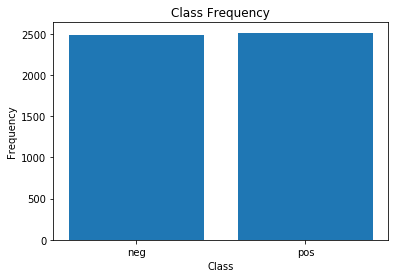

In [8]:
import matplotlib.pyplot as plt

unique, counts = np.unique(labels, return_counts=True)

plt.bar(unique,counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

From this plot, we can see that this data is a balance dataset.

## From Raw to Representation Vectors

RAW --> Tokenizer --> Remove Stopwords -->  Remove Punctuation --> Lemmatization --> Remove Number

In [9]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()

# Cleaning the text sentences so that punctuation marks, stop words & digits are removed  
# Raw --> tokens --> remove stopwords --> remove punctuation --> Lemmatization --> remove number
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    processed = re.sub(r"\d+","",normalized)
    cleaned_data = processed.split()
    return cleaned_data

In [10]:
print("We make the transformation of Data into Tokens")
[n,d] = data.shape
data['Tokens'] = ['']*n

for index, row in data.iterrows():
    data['Tokens'].iloc[index] = clean(row['Content'])
data.head(10)

We make the transformation of Data into Tokens


,Filename,Content,Tokens
0,7650_9,"Wow, I loved this film. It may not have had th...","[wow, loved, film, may, funding, advertising, ..."
1,10987_4,I greatly enjoyed Margaret Atwood's novel 'The...,"[greatly, enjoyed, margaret, atwoods, novel, t..."
2,151_1,This is really terrible.<br /><br />The only r...,"[really, terriblebr, br, the, redeeming, featu..."
3,4761_10,An excellent film with great performances from...,"[excellent, film, great, performance, zack, lo..."
4,7078_9,"""Twelve Monkeys"" is odd and disturbing, yet be...","[twelve, monkey, odd, disturbing, yet, clever,..."
5,400_10,"When Tsui Hark experiments, nothing and no one...","[tsui, hark, experiment, nothing, one, withsta..."
6,4592_9,Jackie Chan's Police Story is a landmark film ...,"[jackie, chans, police, story, landmark, film,..."
7,2191_10,Shakespeare said that we are actors put into a...,"[shakespeare, said, actor, put, great, stage, ..."
8,12482_4,Deathstalker is directed by John Watson and it...,"[deathstalker, directed, john, watson, star, r..."
9,11644_10,This show is awesome! I have been a fan since ...,"[show, awesome, fan, since, premiered, keep, w..."


In [11]:
def extract_adj(text):
    import nltk
    lines = text
    # function to test if something is a noun
    is_noun = lambda pos: pos[:1] == 'J'
    # do the nlp stuff
    tokenized = nltk.word_tokenize(lines)
    nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
    return nouns

In [12]:
[n,d] = data.shape
data['ADJ_Tokens'] = ['']*n

for index, row in data.iterrows():
    data['ADJ_Tokens'].iloc[index] = extract_adj(" ".join(row['Tokens']))
data.head(10)

,Filename,Content,Tokens,ADJ_Tokens
0,7650_9,"Wow, I loved this film. It may not have had th...","[wow, loved, film, may, funding, advertising, ...","[latest, pack, twice, emotional, utah, main, e..."
1,10987_4,I greatly enjoyed Margaret Atwood's novel 'The...,"[greatly, enjoyed, margaret, atwoods, novel, t...","[margaret, see, cop, excop, clear, dead, crazy..."
2,151_1,This is really terrible.<br /><br />The only r...,"[really, terriblebr, br, the, redeeming, featu...","[terriblebr, redeeming, next, worst, replybr, ..."
3,4761_10,An excellent film with great performances from...,"[excellent, film, great, performance, zack, lo...","[excellent, great, much, due, sympathy, long, ..."
4,7078_9,"""Twelve Monkeys"" is odd and disturbing, yet be...","[twelve, monkey, odd, disturbing, yet, clever,...","[clever, intelligent, cleverly, cole, past, hu..."
5,400_10,"When Tsui Hark experiments, nothing and no one...","[tsui, hark, experiment, nothing, one, withsta...","[h, like, second, extraordinary, recent, sever..."
6,4592_9,Jackie Chan's Police Story is a landmark film ...,"[jackie, chans, police, story, landmark, film,...","[kong, chan, basic, nice, convict, local, spec..."
7,2191_10,Shakespeare said that we are actors put into a...,"[shakespeare, said, actor, put, great, stage, ...","[great, israel, interpret, full, hard, spectac..."
8,12482_4,Deathstalker is directed by John Watson and it...,"[deathstalker, directed, john, watson, star, r...","[john, famous, understood, right, evil, many, ..."
9,11644_10,This show is awesome! I have been a fan since ...,"[show, awesome, fan, since, premiered, keep, w...","[awesome, ive, terrible, wish, show, addict, d..."


## Split Raw data into Train and Test set

We split the raw data with labels into training set and testing set with the ratio: Train|Test = 70|30

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3)

In [14]:
print('The size of train and test sets are:', [len(X_train),len(X_test)])

The size of train and test sets are: [3500, 1500]


In [15]:
print('The training data is:')
X_train.head(5)

The training data is:


,Filename,Content,Tokens,ADJ_Tokens
4195,4953_8,"Running only seventy-two minutes, this small, ...","[running, seventytwo, minute, small, overlooke...","[seventytwo, small, dramedy, twocharacter, var..."
1664,7543_1,A trooper is on the side of the road making su...,"[trooper, side, road, making, sure, every, obe...","[trooper, sure, pull, wrong, okay, good, good,..."
4793,10625_7,"""Hatred of a Minute"" is arguably one of the be...","[hatred, minute, arguably, one, better, film, ...","[better, recent, brilliant, worth, sordid, eri..."
2494,3052_10,Strange yet emotionally disturbing chiller abo...,"[strange, yet, emotionally, disturbing, chille...","[strange, major, american, professional, remar..."
4441,5763_1,"<br /><br />""step aside for hollywood veterans...","[br, br, step, aside, hollywood, veteran, the,...","[br, many, recent, stupendous, touch, physical..."


In [16]:
print('The testing data is:')
X_test.head(5)

The testing data is:


,Filename,Content,Tokens,ADJ_Tokens
2464,3879_4,Rebar is an astronaut who goes on the world's ...,"[rebar, astronaut, go, world, first, space, mi...","[return, stricken, bizarre, lose, regularly, h..."
3332,6927_2,Although I rated this movie a 2 for showing a ...,"[although, rated, movie, showing, complete, la...","[complete, create, unintentional, funny, knew,..."
4978,542_9,When I first found out that Brian Krause was g...,"[first, found, brian, krause, going, movie, wa...","[ive, original, better, sequel, jerklike, nels..."
3356,9358_4,"From the moment the film begins, already there...","[moment, film, begin, already, discrepancy, fi...","[middle, international, proper, accent, sound,..."
4382,351_4,1st watched 2/16/2002 - 4 out of 10(Dir-Arne G...,"[st, watched, dirarne, glimcher, mysterythrill...","[dirarne, many, ridiculous, predictable, downr..."


Positive ADJ words


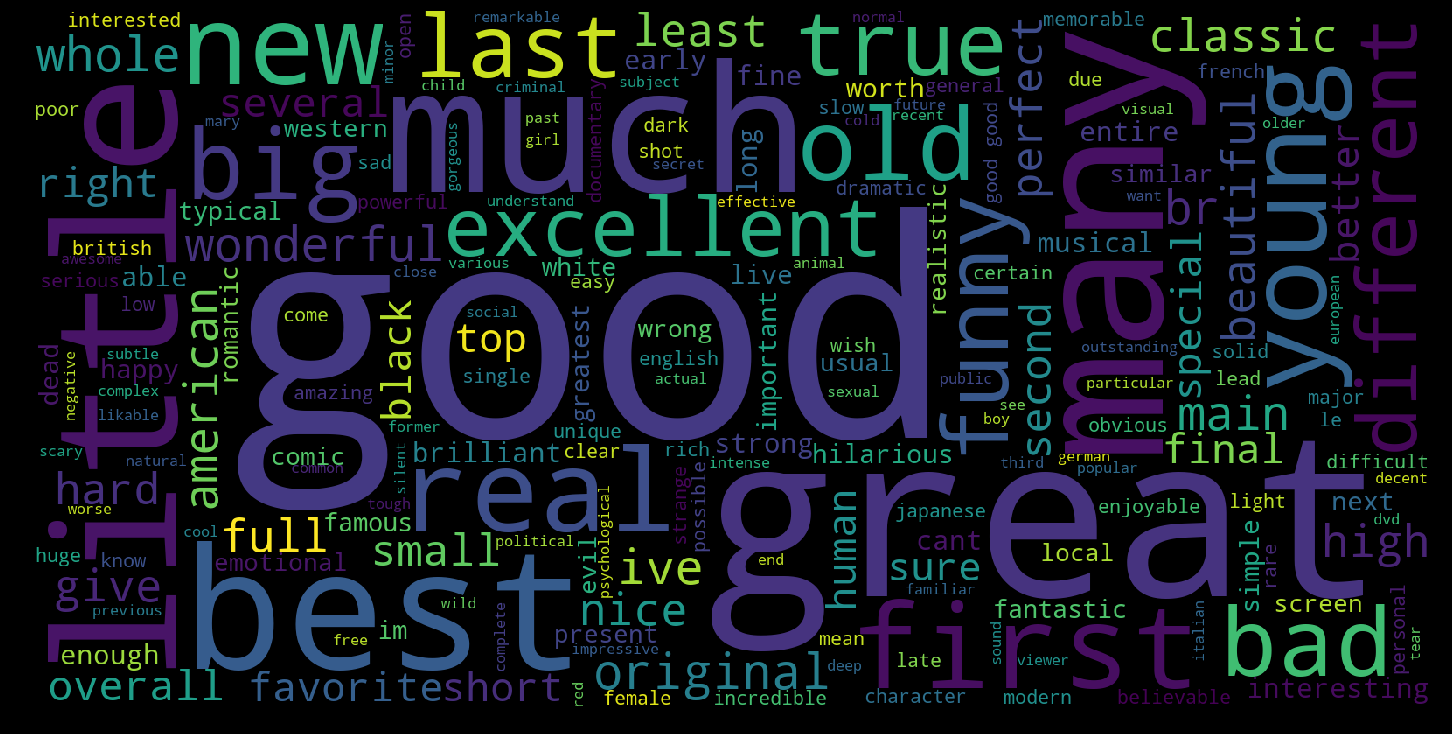

Negative ADJ words


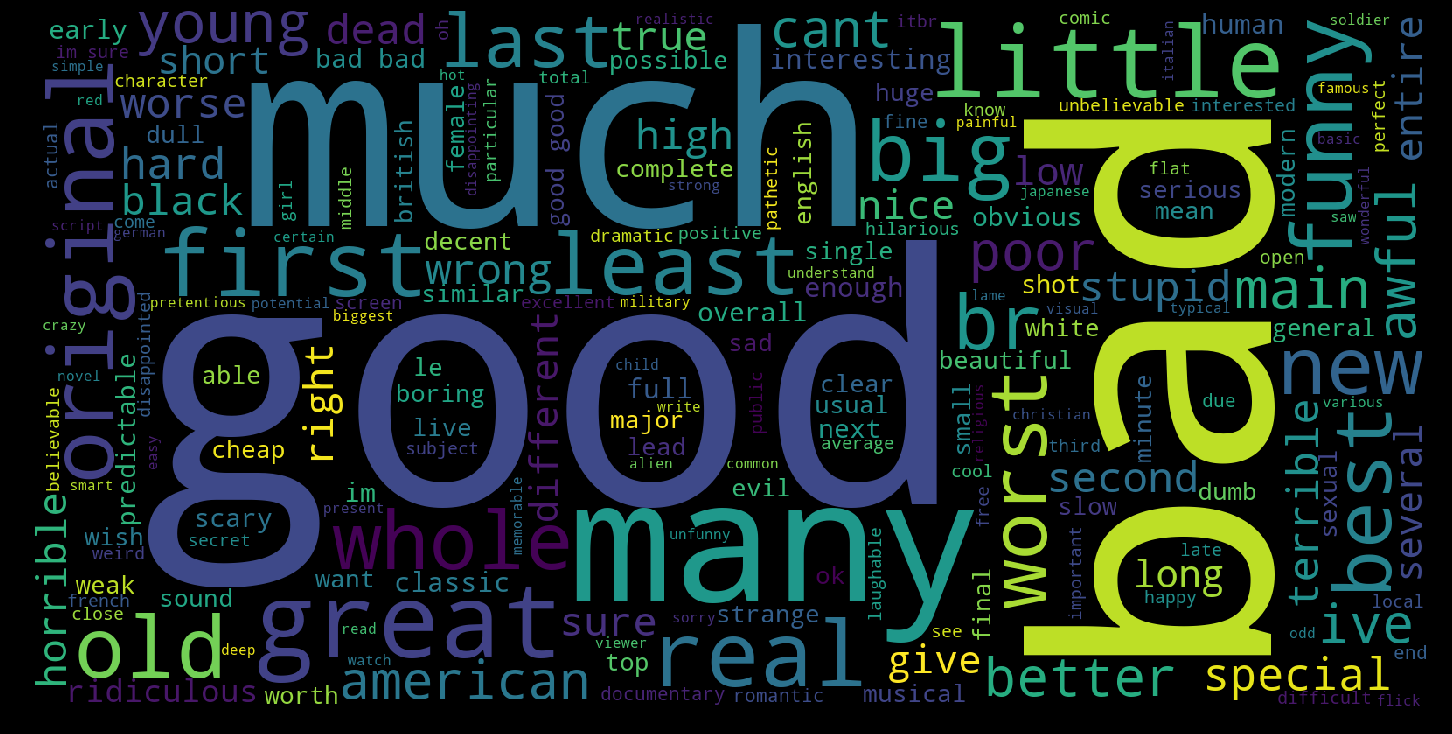

In [17]:
def getAllTokens(df):
    """
    Convert the tokens column in a dataframe into a list of strings of every 
    token in the tokens column.
    """
    return [token for tokens in df for token in tokens]

## Wordcloud function
def wordcloudplot(tokens):
    # visualization by wordcloud
    from wordcloud import WordCloud
    import matplotlib.pyplot as plt

    text2 = ' '.join(tokens)

    wordcloud = WordCloud(width=1600, height=800).generate(text2)
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    

train_pos = X_train[ y_train == 'pos']
train_pos = getAllTokens(train_pos['ADJ_Tokens'])

train_neg = X_train[ y_train == 'neg']
train_neg = getAllTokens(train_neg['ADJ_Tokens'])


print("Positive ADJ words")
wordcloudplot(train_pos)
print("Negative ADJ words")
wordcloudplot(train_neg)

Here, we can see several things should do to improve the quality of clean-data:
- Handle the negation words: "no", "not", "but, ...
- Handle the combination of: "not good", "not great", ...
- Handle "much", "many", "little", ...
- Handle the "comparative adjective" and "superlative adjective"
- Handle the words related to nation: "british", "japanese", ...
+ Extract something in grammar: ADJ + N, and "to be" + ADJ

However, I will not try to solve those things in this LAB.

## Tokens Vectors to TF-IDF Vectors

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(norm='l1',stop_words='english')  
list_contents =[]
for index, row in X_train.iterrows():
    list_contents.append(' '.join(row.Tokens))
    
# list_contents = df_handle.Content.values

tfidf_matrix = tfidf_vectorizer.fit_transform(list_contents)
df_tfidf_train = pd.DataFrame(tfidf_matrix.toarray(),columns=[tfidf_vectorizer.get_feature_names()])
print(len(df_tfidf_train))
df_tfidf_train.head(5)


3500


,aa,aaa,aaaugh,aachen,aamir,aardman,aaron,aarp,aatish,ab,...,zuni,zuniga,zvonimir,zyuranger,½th,álvaro,ángel,ème,émigré,überspy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
## Perform the same preprocessing for test data
test_clean_data = []
for test in X_test.Tokens:
    cleaned_test = test
    cleaned = ' '.join(cleaned_test)
    cleaned = re.sub(r"\d+","",cleaned)
    test_clean_data.append(cleaned)

In [20]:
## Also perform the tf-idf with the same vectorizer
tfidf_test = tfidf_vectorizer.transform(test_clean_data)
## For printing that tf-idf matrix, we convert it into dataframe
df_tfidf_test = pd.DataFrame(tfidf_test.toarray(),columns=[tfidf_vectorizer.get_feature_names()])
print(len(df_tfidf_test))
df_tfidf_test.head(5)

1500


,aa,aaa,aaaugh,aachen,aamir,aardman,aaron,aarp,aatish,ab,...,zuni,zuniga,zvonimir,zyuranger,½th,álvaro,ángel,ème,émigré,überspy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Learning

Here, for fast check in class, I used the default alpha=1 for Bayes, and K=3 for KNN.
When you want to learn the model, please remember to have a <span class="mark">hyperparameter tuning</span> for model. 

### BAYES classifier

In [21]:
# Classifying the document with BAYES classifier
modelbayes = MultinomialNB()
modelbayes.fit(df_tfidf_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### KNN classifier


In [22]:
# Classifying the document with KNN classifier, k=3
modelknn = KNeighborsClassifier(n_neighbors=3,metric= 'cosine')
modelknn.fit(df_tfidf_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='cosine',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

## Applying Models to Test Data

In [23]:
## Applying the model to the test_data
predicted_labels_bayes = modelbayes.predict(df_tfidf_test)
predicted_probas_bayes = modelbayes.predict_proba(df_tfidf_test)


In [24]:
## Applying the model to the test_data - very long execution time
predicted_labels_knn = modelknn.predict(df_tfidf_test)
predicted_probas_knn = modelknn.predict_proba(df_tfidf_test)

## Evaluation Metrics

### Accuracy and Error Rate

Classification accuracy is the number of correct predictions made as a ratio of all predictions made.

    classification accuracy = correct predictions / total predictions

    classification error = wrong predictions / total predictions = 1 - classification accuracy

In [25]:
from sklearn.metrics import accuracy_score
Acc_bayes = accuracy_score(y_test, predicted_labels_bayes)
Acc_knn   = accuracy_score(y_test, predicted_labels_knn)
print('Accuracy rate for NB model: {:0.2f}%'.format(Acc_bayes*100))
print('Accuracy rate for KNN model: {:0.2f}%'.format(Acc_knn*100))

Accuracy rate for NB model: 81.47%
Accuracy rate for KNN model: 72.53%


In [26]:
Err_bayes = 1 - Acc_bayes
Err_knn   = 1 - Acc_knn
print('Error rate for NB model: {:0.2f}%'.format(Err_bayes*100))
print('Error rate for KNN model: {:0.2f}%'.format(Err_knn*100))

Error rate for NB model: 18.53%
Error rate for KNN model: 27.47%


<span class="burk">Limitations of Accuracy:</span>

- When you are data has more than 2 classes.

> With 3 or more classes you may get a classification accuracy of 80%, but you don’t know if that is because all classes are being predicted equally well or whether one or two classes are being neglected by the model.

- When your data is not a balance data.

> You may achieve accuracy of 90% or more, but this is not a good score if 90 records for every 100 belong to one class and you can achieve this score by always predicting the most common class value.

### Confusion Matrix

<span class="mark">**What is Confusion Matrix?**</span>

A confusion matrix is a summary of prediction results on a classification problem.

It is a performance measurement for machine learning classification problem where output can be two or more classes. In case binary classification, it is a table with 4 different combinations of predicted and actual values: TP: True Positives; FP: False Positives; TN: True Negatives; and FN: False Negatives.

<img src='./img/CFM.jpg'>


- **True Positives (TP)**: These are cases in which we predicted YES, and the groundtruth is YES.

- **True Negatives (TN)**: We predicted NO, and the groundtruth is NO.

- **False Positives (FP)**: We predicted YES, but the groundtruth is NO. (Also known as a "Type I error.")

- **False Negatives (FN)**: We predicted NO, but and the groundtruth is YES. (Also known as a "Type II error.")

Let’s understand TP, FP, FN, TN in terms of pregnancy analogy.

<img src='./img/CFM_example.png'>


<span class="mark">**Why is Confusion Matrix important?**</span>

Because, from Confusion Matrix, we can calculate many Evaluation Metric for classification model.
Below, are the list of few but important metrics that are computed from a Confusion Matrix for a binary classifier. In simple words, these metrics determine how well the model performs.

- Accuracy

- Precision

- Recall

- F1 Score

- ROC Curve

#### Print Confusion Matrix (Using Sklearn)

In [27]:
from sklearn.metrics import confusion_matrix

def cm2df(cm, labels):
    df = pd.DataFrame()
    # rows
    for i, row_label in enumerate(labels):
        rowdata={}
        # columns
        for j, col_label in enumerate(labels): 
            rowdata[col_label]=cm[i,j]
        df = df.append(pd.DataFrame.from_dict({row_label:rowdata}, orient='index'))
    return df[labels]

In [28]:
cm_bayes = confusion_matrix(y_test, predicted_labels_bayes)
cm_as_df_bayes=cm2df(cm_bayes,['neg','pos'])
# then print it in a pretty way
(cm_as_df_bayes)

,neg,pos
neg,676,50
pos,228,546


In [29]:
cm_knn = confusion_matrix(y_test, predicted_labels_knn)
cm_as_df_knn=cm2df(cm_knn,['neg','pos'])
# then print it in a pretty way
(cm_as_df_knn)

,neg,pos
neg,490,236
pos,176,598


#### Print Confusion Matrix (Using pandas_ml)

Or you can use the package **pandas_ml** (pip install pandas_ml) to print Confusion Matrix more beautiful.

In [30]:
import sys
!{sys.executable} -m pip install pandas_ml

In [31]:
from pandas_ml import ConfusionMatrix

y_actu = np.where(y_test == 'pos', True, False)
y_pred_bayes = np.where(predicted_labels_bayes == 'pos', True, False)

cm_bayes2 = ConfusionMatrix(y_actu, y_pred_bayes)
cm_bayes2

Predicted  False  True  __all__
Actual                         
False        676    50      726
True         228   546      774
__all__      904   596     1500

In [32]:
from pandas_ml import ConfusionMatrix

y_actu = np.where(y_test == 'pos', True, False)
y_pred_knn = np.where(predicted_labels_knn == 'pos', True, False)

cm_knn2 = ConfusionMatrix(y_actu, y_pred_knn)
cm_knn2

Predicted  False  True  __all__
Actual                         
False        490   236      726
True         176   598      774
__all__      666   834     1500

#### Plot the Confusion Matrix

We also can use sklearn to print the confusion matrix.

In [44]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    width, height = cm.shape
    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Confusion Matrix for Naive Bayes Classifier


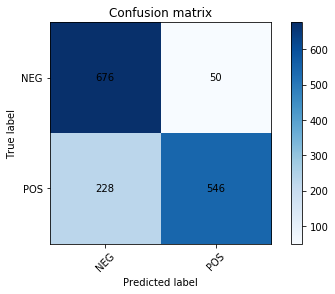

In [34]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix for Naive Bayes Classifier')
plot_confusion_matrix(cm_bayes, ['NEG', 'POS'])

Confusion Matrix for KNN Classifier


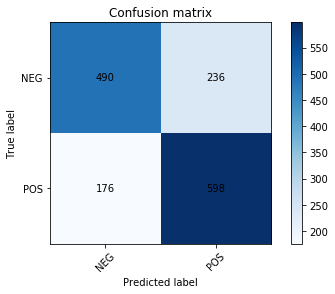

In [35]:
print('Confusion Matrix for KNN Classifier')
plot_confusion_matrix(cm_knn, ['NEG', 'POS'])

### Precision - Recall - F1

#### Precision

Let's look at Precision first.

<img src='./img/precision2.png'>

The denominator is actually the Total Predicted Positive!

<img src='./img/cm_precision.png'>

From the formula, we can see that: Precision is *high* when False Positive is *small*.

> Q: Why we should to link **False Positive** to **Precision**? 


For example, email spam detection. In email spam detection, a False Positive means that an email that is non-spam (actual negative) has been identified as spam (predicted spam) 

=> dangerous case. 

<img src='./img/spamdetection.png'>
So, we want to minimize the FP in this case 
==> maximize the Precision.

**Conclude**: The email user might lose important emails if the Precision is not HIGH for the spam detection model.

#### Recall

Now, let's look at Recall.

<img src='./img/recall.png'>

The denominator is actually the Total Actual Positive!

<img src='./img/cm_recall.jpg'>

From the formula, we can see that: Recall is *high* when False Negative is *small*.

> Q: Why we should to link **False Negative** to **Recall**? 

For example, sick patient detection. If a sick patient (Actual Positive) goes through the test and predicted as not sick (Predicted Negative) ==> False Negative case.

=> dangerous case. 

<img src='./img/recallexample.jpg'>

So, we want to minimize the False Negative in predict model.
==> maximize the Recall.

**Conclude**: The cost associated with False Negative will be **extremely high** if the sickness is **contagious**. 

### F1 Score

The formula of F1 score is

<img src='./img/f1.png'>

F1 Score is needed when you want to seek a balance between Precision and Recall.

So what is the difference between F1 Score and Accuracy then? 
- <span class="mark">F1 is usually more useful than accuracy, especially if you have an uneven class distribution</span>

Let's get an example of one confusion matrix as follows

| ... | Predicted positive | Predicted negative |
| --- | --- | --- |
| Positive class | 1 (TP) | 25 (FN) |
| Negative class | 2 (FP) | 125 (TN)|

So, Accuracy will be 

        Accuracy = (1 + 125)/(1 + 125 + 2 + 25) = 82.3%

This looks crazy. Our model is a completely wrong one, with no predictive power, and we got an increase in accuracy.

Now, we check the F1:

    Precision = TP / (TP + FP) = 1 / (1 + 2) = 0.33
    Recall = TP /(TP + FN) = 1 / (1 + 25) = 0.04
    
    F1 = 2*(Recall * Precision) / (Recall + Precision) = 2*0.33*0.04 / (0.33+0.04) = 0.071 = 7.1%
    
The F1 score will show you this predicted model is not really good.

**Note from StackExchange**
<https://stats.stackexchange.com/questions/49226/how-to-interpret-f-measure-values>

The importance of the F1 score is different based on the scenario. Lets assume the target variable is a binary label.

- **Balanced class**: In this situation, the F1 score can effectively be ignored, the mis-classification rate is key.
- **Unbalanced class**, but **both classes are important**: If the class distribution is highly skewed (such as 80:20 or 90:10), then a classifier can get a low mis-classification rate simply by choosing the majority class. In such a situation, I would choose the classifier that gets high F1 scores on both classes, as well as low mis-classification rate. A classifier that gets low F1-scores should be overlooked.
- **Unbalanced class**, but **one class if more important that the other**. For e.g. in Fraud detection, it is more important to correctly label an instance as fraudulent, as opposed to labeling the non-fraudulent one. In this case, I would pick the classifier that has a good F1 score only on the important class. Recall that the F1-score is available per class.


In [36]:
from sklearn.metrics import classification_report
print('Statistic Report for Naive Bayes classifier')
print(classification_report(y_test, predicted_labels_bayes))

Statistic Report for Naive Bayes classifier
             precision    recall  f1-score   support

        neg       0.75      0.93      0.83       726
        pos       0.92      0.71      0.80       774

avg / total       0.83      0.81      0.81      1500



In [37]:
print('Statistic Report for KNN classifier')
print(classification_report(y_test, predicted_labels_knn))

Statistic Report for KNN classifier
             precision    recall  f1-score   support

        neg       0.74      0.67      0.70       726
        pos       0.72      0.77      0.74       774

avg / total       0.73      0.73      0.72      1500



### Area Under the Curve

- Accuracy can let you know that you got the class label right or you didn’t. 

- Many classifiers can provide you more information than the predicted labels. They can give you the probability values. In that case, in order to compute the accuracy from probabilities you need a threshold to decide where the separated line of two classes. The most natural threshold is of course 0.5.

- Let’s suppose you have one classifier, which is able to get all the answers right, but its output scores are 0.7 for negative examples and 0.9 for positive examples. Clearly, a threshold of 0.5 won’t get you a good cut. But 0.8 would be just perfect.

- That’s the whole point of using AUC - it considers all possible thresholds.

#### ROC curve

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:
- True Positive
- False Positive

How to get the ROC curve?

Example1: http://www.navan.name/roc/

Example2: https://kennis-research.shinyapps.io/ROC-Curves/


How to know the good ROC?

<img src = './img/ROC_space.png'>

<img src = './img/roccomp.png'>


#### AUC - Area Under the Curve

Just remember that: if <span class="girk">AUC -> high</span>, then <span class="girk">your model -> good</span>

<img src = './img/AUC.png'>

#### Plot Individually Plot

In [38]:
import sys
!{sys.executable} -m pip install scikit-plot

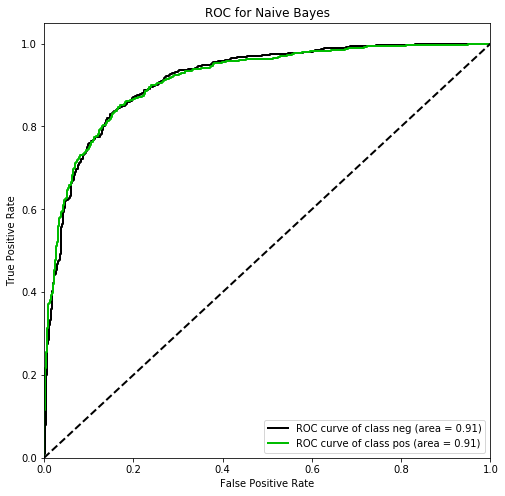

In [39]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc(y_test, predicted_probas_bayes,plot_micro=False,plot_macro=False, 
                       title='ROC for Naive Bayes',figsize=(8,8))
plt.show()

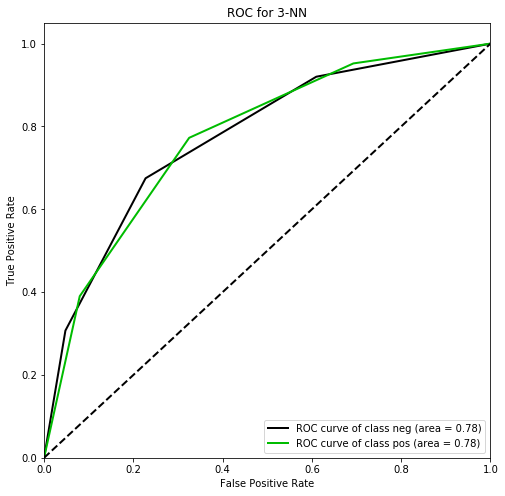

In [40]:
skplt.metrics.plot_roc(y_test, predicted_probas_knn,plot_micro=False,plot_macro=False, 
                       title='ROC for 3-NN',figsize=(8,8))
plt.show()

#### Plot 2 ROC in one Figure

In [41]:
from sklearn.preprocessing import label_binarize
b_y_actual = label_binarize(y_test, classes=['neg','pos'])
b_y_predict_bayes = label_binarize(predicted_labels_bayes, classes=['neg','pos'])
b_y_predict_knn = label_binarize(predicted_labels_knn, classes=['neg','pos'])

In [42]:
def plotROC(prediction_prob,label,legend):
    from sklearn import metrics
    import matplotlib.pyplot as plt
    import numpy as np
    fpr, tpr, thresh = metrics.roc_curve(label, prediction_prob)
    auc = np.round(metrics.roc_auc_score(label, prediction_prob),2)
    plt.plot(fpr,tpr,label=legend+ " ,AUC="+str(auc))

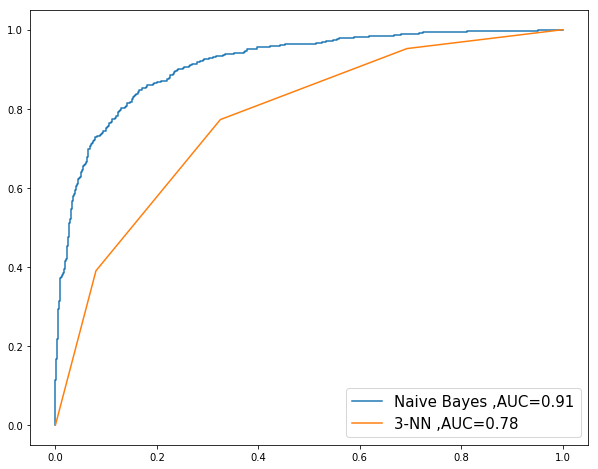

In [43]:
plt.figure(figsize=(10,8)).clf()

plotROC(predicted_probas_bayes[:,1],b_y_actual,'Naive Bayes')
plotROC(predicted_probas_knn[:,1],b_y_actual,'3-NN')

plt.legend(loc=4,prop={'size': 15})
plt.show()

Read more for ROC with cross-validation at: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py